In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
pd.set_option('display.max_columns',200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df1=pd.read_csv("ttrain.csv")

In [4]:
df2=pd.read_csv("ttest.csv") 

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df1.shape

(891, 12)

In [8]:
df2.shape

(418, 11)

In [9]:
df=df1.append(df2)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.shape

(1309, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

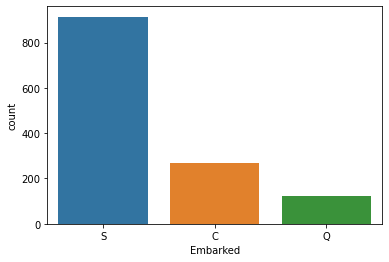

In [17]:
sns.countplot(x=df["Embarked"])

In [18]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [19]:
df["Embarked"]=df["Embarked"].fillna("s")

In [ ]:
#1014/1309 #%20 den fazlası boş ise o sütunu silebilirsiniz. %75 boş

In [20]:
del df["Cabin"]

In [21]:
df["Title"]=df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [23]:
del df["Name"]

In [24]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [25]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [26]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss") #ms mlle yi miss le değiştiriyoruz
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [27]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [28]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [29]:
df.groupby('Sex')["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [30]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [31]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [32]:
df["Family"]=df["SibSp"]+df["Parch"]+1 

In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [34]:
data=pd.get_dummies(df,drop_first=True)

In [35]:
train=data[:891] #train dosyası ilk 891 veri , kalanı test datası
test=data[891:]

In [36]:
x=train.drop("Survived",axis=1)

In [37]:
y=df1["Survived"]

In [38]:
model=Sequential()
model.add(Dense(15,activation='relu'))#1. nöronun diğer nöronlara bağlanacağını söylüyoruz
model.add(Dense(12,activation='relu'))#birden fazla layer varsa relu
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))#cevabı evet hayırsa sigmoid.son nöronun aktivasyon kodunun 1 olması lazım,çünkü sonuncu evet yada hayır olacak
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [39]:
model.fit(x,y,epochs=500,batch_size=10,verbose=1) #epoch, nöronlar arasında kaç defa gidip geleceğimizi belirliyoruz
#verbose aşağıda çalıştığını gösteriyor, batch_size bir seferde 10 satırlık veri alıyor

Epoch 1/500
90/90 [==============================] - 2s 3ms/step - loss: 0.6505 - accuracy: 0.6150
Epoch 2/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6364
Epoch 3/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.5948
Epoch 4/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.6532
Epoch 5/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6925
Epoch 6/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.6891
Epoch 7/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.6981
Epoch 8/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7003
Epoch 9/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6790
Epoch 10/500
90/90 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.6588
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9798
Epoch 84/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9663
Epoch 85/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9719
Epoch 86/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9899
Epoch 87/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9708
Epoch 88/500
90/90 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9574
Epoch 89/500
90/90 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9450
Epoch 90/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9663
Epoch 91/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9921
Epoch 92/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.9675
Epoch 93/500


90/90 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9865
Epoch 165/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9809
Epoch 166/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9731
Epoch 167/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9843
Epoch 168/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9843
Epoch 169/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9787
Epoch 170/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9843
Epoch 171/500
90/90 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9529
Epoch 172/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9921
Epoch 173/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9843
Epoc

90/90 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9832
Epoch 246/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9865
Epoch 247/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9921
Epoch 248/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9910
Epoch 249/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9865
Epoch 250/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9843
Epoch 251/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9843
Epoch 252/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9910
Epoch 253/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9955
Epoch 254/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9888
Epoc

90/90 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9686
Epoch 327/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9921
Epoch 328/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9944
Epoch 329/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9910
Epoch 330/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9742
Epoch 331/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9764
Epoch 332/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9843
Epoch 333/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9798
Epoch 334/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9652
Epoch 335/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9921
Epoc

90/90 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9921
Epoch 408/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9933
Epoch 409/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9877
Epoch 410/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9921
Epoch 411/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9966
Epoch 412/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9966
Epoch 413/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9820
Epoch 414/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9877
Epoch 415/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9832
Epoch 416/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9776
Epoc

90/90 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9944
Epoch 489/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9978
Epoch 490/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9944
Epoch 491/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9933
Epoch 492/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9888
Epoch 493/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9910
Epoch 494/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9832
Epoch 495/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9944
Epoch 496/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9944
Epoch 497/500
90/90 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9955
Epoc

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                14145     
                                                                 
 dense_1 (Dense)             (None, 12)                192       
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14,596
Trainable params: 14,596
Non-traina

In [41]:
scores=model.evaluate(x,y) #loss hata

28/28 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.9349


In [42]:
history=model.fit(x,y,epochs=500,validation_split=0.20,batch_size=10,verbose=1)

Epoch 1/500
72/72 [==============================] - 0s 6ms/step - loss: 0.2104 - accuracy: 0.9312 - val_loss: 0.0524 - val_accuracy: 0.9944
Epoch 2/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9944 - val_loss: 0.0266 - val_accuracy: 0.9944
Epoch 3/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9916 - val_loss: 0.0183 - val_accuracy: 0.9944
Epoch 4/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0826 - val_accuracy: 0.9721
Epoch 5/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9930 - val_loss: 0.0214 - val_accuracy: 0.9944
Epoch 6/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9944 - val_loss: 0.0233 - val_accuracy: 0.9944
Epoch 7/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0127 - val_accuracy: 0.9944
Epoch 8/500
7

Epoch 59/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0337 - val_accuracy: 0.9944
Epoch 60/500
72/72 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9719 - val_loss: 0.0667 - val_accuracy: 0.9665
Epoch 61/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9733 - val_loss: 0.0447 - val_accuracy: 0.9888
Epoch 62/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0473 - val_accuracy: 0.9832
Epoch 63/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 64/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.0210 - val_accuracy: 0.9944
Epoch 65/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.0185 - val_accuracy: 0.9944
Epoch 

72/72 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.0399 - val_accuracy: 0.9888
Epoch 117/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0363 - val_accuracy: 0.9944
Epoch 118/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 119/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9972 - val_loss: 0.0224 - val_accuracy: 0.9944
Epoch 120/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9972 - val_loss: 0.0426 - val_accuracy: 0.9777
Epoch 121/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9972 - val_loss: 0.0197 - val_accuracy: 0.9944
Epoch 122/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0320 - val_accuracy: 0.9944
Epoch 123/500

72/72 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9663 - val_loss: 0.1525 - val_accuracy: 0.9162
Epoch 174/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 0.0321 - val_accuracy: 0.9944
Epoch 175/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0392 - val_accuracy: 0.9944
Epoch 176/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9972 - val_loss: 0.0284 - val_accuracy: 0.9944
Epoch 177/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.1364 - val_accuracy: 0.9050
Epoch 178/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0348 - val_accuracy: 0.9888
Epoch 179/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0474 - val_accuracy: 0.9888
Epoch 180/500

72/72 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9958 - val_loss: 0.1987 - val_accuracy: 0.9162
Epoch 231/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.2704 - val_accuracy: 0.9330
Epoch 232/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9817 - val_loss: 0.0613 - val_accuracy: 0.9888
Epoch 233/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9958 - val_loss: 0.2151 - val_accuracy: 0.9385
Epoch 234/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9958 - val_loss: 0.0563 - val_accuracy: 0.9888
Epoch 235/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0739 - val_accuracy: 0.9832
Epoch 236/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0655 - val_accuracy: 0.9888
Epoch 237/500

72/72 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9958 - val_loss: 0.1398 - val_accuracy: 0.9553
Epoch 288/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9789 - val_loss: 0.0604 - val_accuracy: 0.9665
Epoch 289/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9888 - val_loss: 0.0596 - val_accuracy: 0.9888
Epoch 290/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.1097 - val_accuracy: 0.9385
Epoch 291/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9972 - val_loss: 0.1139 - val_accuracy: 0.9385
Epoch 292/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.1097 - val_accuracy: 0.9497
Epoch 293/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0956 - val_accuracy: 0.9497
Epoch 294/500

72/72 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.2728 - val_accuracy: 0.9050
Epoch 345/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0733 - val_accuracy: 0.9777
Epoch 346/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 347/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1209 - val_accuracy: 0.9665
Epoch 348/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 0.0814 - val_accuracy: 0.9665
Epoch 349/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.0756 - val_accuracy: 0.9832
Epoch 350/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0741 - val_accuracy: 0.9777
Epoch 351/500

72/72 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0881 - val_accuracy: 0.9777
Epoch 402/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0708 - val_accuracy: 0.9777
Epoch 403/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.0794 - val_accuracy: 0.9777
Epoch 404/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9916 - val_loss: 0.1130 - val_accuracy: 0.9721
Epoch 405/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.0736 - val_accuracy: 0.9777
Epoch 406/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0729 - val_accuracy: 0.9832
Epoch 407/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9846 - val_loss: 0.5870 - val_accuracy: 0.8212
Epoch 408/500

72/72 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.1108 - val_accuracy: 0.9777
Epoch 459/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.1041 - val_accuracy: 0.9777
Epoch 460/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9986 - val_loss: 0.0933 - val_accuracy: 0.9777
Epoch 461/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1412 - val_accuracy: 0.9665
Epoch 462/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9860 - val_loss: 0.1797 - val_accuracy: 0.9665
Epoch 463/500
72/72 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.1607 - val_accuracy: 0.9553
Epoch 464/500
72/72 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9944 - val_loss: 0.8791 - val_accuracy: 0.7933
Epoch 465/500